In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [363]:
col_names = (
    ["unit", "cycle"]
  + [f"op{i}" for i in range(1,4)]
  + [f"s{i}"  for i in range(1,22)]
)


train1 = pd.read_csv(
    "train_FD001.txt",      
    sep=r"\s+",             
    header=None,            
    names=col_names,        
    engine="python"         
)


print(train1.shape)
train1.head()


(20631, 26)


,unit,cycle,op1,op2,op3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [364]:
train1.isnull().sum()

unit     0
cycle    0
op1      0
op2      0
op3      0
s1       0
s2       0
s3       0
s4       0
s5       0
s6       0
s7       0
s8       0
s9       0
s10      0
s11      0
s12      0
s13      0
s14      0
s15      0
s16      0
s17      0
s18      0
s19      0
s20      0
s21      0
dtype: int64

In [365]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   unit    20631 non-null  int64  
 1   cycle   20631 non-null  int64  
 2   op1     20631 non-null  float64
 3   op2     20631 non-null  float64
 4   op3     20631 non-null  float64
 5   s1      20631 non-null  float64
 6   s2      20631 non-null  float64
 7   s3      20631 non-null  float64
 8   s4      20631 non-null  float64
 9   s5      20631 non-null  float64
 10  s6      20631 non-null  float64
 11  s7      20631 non-null  float64
 12  s8      20631 non-null  float64
 13  s9      20631 non-null  float64
 14  s10     20631 non-null  float64
 15  s11     20631 non-null  float64
 16  s12     20631 non-null  float64
 17  s13     20631 non-null  float64
 18  s14     20631 non-null  float64
 19  s15     20631 non-null  float64
 20  s16     20631 non-null  float64
 21  s17     20631 non-null  int64  
 22

In [366]:
train1.describe()

,unit,cycle,op1,op2,op3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


# Calculating RUL

In [367]:
train1["max_cycle"] = train1.groupby("unit")["cycle"].transform("max")
train1["RUL"]= train1["max_cycle"] - train1["cycle"]

train1.drop("max_cycle",axis=1,inplace=True)
train1.head(193)

,unit,cycle,op1,op2,op3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127,3
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675,2
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295,1
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,...,2388.32,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649,0


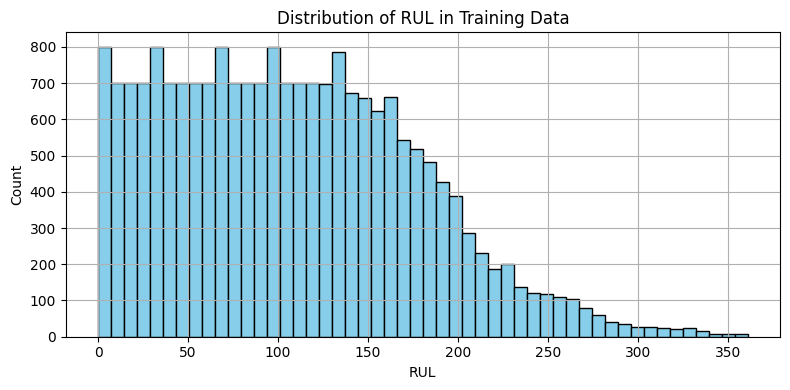

In [368]:
plt.figure(figsize=(8,4))
plt.hist(train1["RUL"],bins=50 , color="skyblue",edgecolor="black")
plt.xlabel("RUL")
plt.ylabel("Count")
plt.title("Distribution of RUL in Training Data")
plt.grid(True)
plt.tight_layout()
plt.show()

In [369]:
variances = train1[feature_cols].var()
print(variances)

s2          0.250053
s3         37.590994
s4         81.010886
s7          0.783388
s8          0.005039
s9        487.653568
s11         0.071336
s12         0.543985
s13         0.005172
s14       363.900490
s15         0.001407
s17         2.398667
s20         0.032669
s21         0.011718
cycle    4744.590808
dtype: float64


In [370]:
train1 = train1.drop(columns=['op1', 'op2', 'op3', 's1', 's5', 's6', 's10', 's16', 's18', 's19'])

In [371]:
train1.head()

,unit,cycle,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


In [372]:
feature_cols = [
    
     "s2", "s3", "s4",   "s7",
    "s8", "s9",  "s11", "s12", "s13",
    "s14", "s15",  "s17",  "s20", "s21"
]


correlation= train1[feature_cols + ["RUL"]].corr(method="pearson")["RUL"].sort_values()
print(correlation)

s11   -0.696228
s4    -0.678948
s15   -0.642667
s2    -0.606484
s17   -0.606154
s3    -0.584520
s8    -0.563968
s13   -0.562569
s9    -0.390102
s14   -0.306769
s20    0.629428
s21    0.635662
s7     0.657223
s12    0.671983
RUL    1.000000
Name: RUL, dtype: float64


In [373]:
variances = train1[feature_cols].var()
print(variances)

s2       0.250053
s3      37.590994
s4      81.010886
s7       0.783388
s8       0.005039
s9     487.653568
s11      0.071336
s12      0.543985
s13      0.005172
s14    363.900490
s15      0.001407
s17      2.398667
s20      0.032669
s21      0.011718
dtype: float64


In [374]:
units = train1["unit"].unique()

# Train-Val split

In [375]:
from sklearn.model_selection import train_test_split

train_units, val_units = train_test_split(
    units,
    test_size=0.3,
    random_state=42
)

In [376]:
train_df = train1[train1["unit"].isin(train_units)].reset_index(drop=True)
val_df = train1[train1["unit"].isin(val_units)].reset_index(drop=True)

In [377]:
x_train = train_df[feature_cols]
y_train = train_df["RUL"]

x_val = val_df[feature_cols]
y_val = val_df["RUL"]

In [378]:
x_train

,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,641.89,1583.84,1391.28,554.53,2388.01,9054.72,46.93,522.33,2388.06,8137.72,8.3905,391,38.94,23.4585
1,641.82,1587.05,1393.13,554.77,2387.98,9051.31,47.24,522.70,2387.98,8131.09,8.4167,392,39.06,23.4085
2,641.55,1588.32,1398.96,555.14,2388.04,9054.24,47.22,522.58,2387.99,8140.58,8.3802,391,39.11,23.4250
3,641.68,1584.15,1396.08,554.25,2387.98,9058.01,47.10,522.49,2387.93,8140.44,8.4018,391,39.13,23.5027
4,641.73,1579.03,1402.52,555.12,2388.03,9058.15,47.25,522.27,2387.94,8136.67,8.3867,390,39.18,23.4234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14502,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
14503,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
14504,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
14505,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


In [379]:
y_train

0        286
1        285
2        284
3        283
4        282
        ... 
14502      4
14503      3
14504      2
14505      1
14506      0
Name: RUL, Length: 14507, dtype: int64

In [380]:
x_val

,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6119,643.52,1605.46,1426.47,553.18,2388.15,9197.35,48.16,520.41,2388.12,8255.95,8.5132,397,38.38,22.9548
6120,643.97,1605.94,1429.90,551.84,2388.16,9201.83,48.07,520.13,2388.08,8258.58,8.4981,400,38.59,23.0657
6121,643.20,1601.34,1429.40,552.04,2388.12,9203.16,48.04,519.98,2388.16,8257.38,8.5402,396,38.39,23.0501
6122,643.46,1606.90,1430.66,552.19,2388.19,9207.74,48.18,520.06,2388.15,8270.91,8.5514,397,38.44,23.1451


In [381]:
y_val

0       191
1       190
2       189
3       188
4       187
       ... 
6119      4
6120      3
6121      2
6122      1
6123      0
Name: RUL, Length: 6124, dtype: int64

# Scaling

In [382]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

feature_cols = (
    [col for col in train1.columns if col.startswith("s")] + ["cycle"]  
)

x_train_scaled = scaler.fit_transform(train_df[feature_cols])
x_val_scaled = scaler.transform(val_df[feature_cols])

In [383]:
print("Train mean:", x_train_scaled.mean(axis=0))
print("Train std:", x_train_scaled.std(axis=0))


Train mean: [ 1.71929105e-13 -2.51361778e-15 -3.35175160e-14 -5.66984401e-14
 -3.65708857e-12  3.15896907e-14 -7.41350717e-15  5.09384742e-16
  2.27484956e-12 -1.24485794e-14  1.54441535e-14  1.19901332e-15
  7.84844337e-15 -1.37357555e-14 -3.13467534e-17]
Train std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [384]:
import joblib

joblib.dump(scaler, "scaler_fd001.pkl")

['scaler_fd001.pkl']

# Random Forest Regressor

In [385]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train_scaled,y_train)

rf_y_pred = rf.predict(x_val_scaled)


In [386]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , r2_score

mse = mean_squared_error(y_val,rf_y_pred)
print("MSE :", mse)

mae = mean_absolute_error(y_val,rf_y_pred)
print("MAE :", mae)

r2 = r2_score(y_val,rf_y_pred)
print("R2 :", r2)

MSE : 1117.4863851894186
MAE : 25.30680111038537
R2 : 0.7368249051137248


# RF with hyperparameter tuning

In [116]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100,200,300,400,500],
    'max_depth': [10,20,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['sqrt','log2']
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring = 'neg_mean_absolute_error',
    verbose=2,
)

grid_search.fit(x_train_scaled,y_train)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(x_val_scaled)


Fitting 3 folds for each of 270 candidates, totalling 810 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=3

In [119]:
mse = mean_squared_error(y_val,y_pred)
print("MSE :", mse)

mae = mean_absolute_error(y_val,y_pred)
print("MAE :", mae)

r2 = r2_score(y_val,y_pred)
print("R2 :", r2)

MSE : 1012.1578449863342
MAE : 24.24226044872872
R2 : 0.761630440939095


# XGboost

In [129]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

xgbr = xgb.XGBRegressor(
    tree_method='hist', 
    device="cuda",
    random_state=42
)


param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

random_search = RandomizedSearchCV(
    estimator=xgbr,
    param_distributions=param_dist,
    n_iter=20,  
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train_scaled, y_train)

best_xgb = random_search.best_estimator_

y_pred_xgb = best_xgb.predict(x_val_scaled)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\tanuj\miniconda3\envs\cuda_env\Lib\site-packages\xgboost\core.py:729: UserWarning: [10:13:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


In [130]:
print("Best Parameters:", random_search.best_params_)

from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , r2_score

mae = mean_absolute_error(y_val, y_pred_xgb)
print("MAE:", mae)

mse = mean_squared_error(y_val, y_pred_xgb)
print("MSE:", mse)

r2 = r2_score(y_val, y_pred_xgb)
print("R2:", r2)

Best Parameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
MAE: 24.989120483398438
MSE: 1048.0989990234375
R2: 0.7531660795211792


# LSTM

In [387]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


#  scaling 

scaler = StandardScaler()
train_df[feature_cols] = scaler.fit_transform(train_df[feature_cols])
val_df[feature_cols] = scaler.transform(val_df[feature_cols])

# windowed sequences
window_size = 100

# training sequences
train_sequences = []
train_targets = []

for unit in train_df["unit"].unique():
    unit_data = train_df[train_df["unit"] == unit]
    x_unit = unit_data[feature_cols].values
    y_unit = unit_data["RUL"].values  

    for i in range(len(x_unit) - window_size + 1):
        seq_x = x_unit[i:i + window_size]
        seq_y = y_unit[i + window_size - 1]
        train_sequences.append(seq_x)
        train_targets.append(seq_y)

x_train_seq = np.array(train_sequences)
y_train_seq = np.array(train_targets)

# val sequences
val_sequences = []
val_targets = []

for unit in val_df["unit"].unique():
    unit_data = val_df[val_df["unit"] == unit]
    x_unit = unit_data[feature_cols].values
    y_unit = unit_data["RUL"].values

    for i in range(len(x_unit) - window_size + 1):
        seq_x = x_unit[i:i + window_size]
        seq_y = y_unit[i + window_size - 1]
        val_sequences.append(seq_x)
        val_targets.append(seq_y)

x_val_seq = np.array(val_sequences)
y_val_seq = np.array(val_targets)


class SimpleDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        x = torch.tensor(self.x[idx], dtype=torch.float32)
        y = torch.tensor(self.y[idx], dtype=torch.float32)
        return x, y

train_dataset = SimpleDataset(x_train_seq, y_train_seq)
val_dataset = SimpleDataset(x_val_seq, y_val_seq)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# model
input_size = x_train_seq.shape[2]
hidden_size = 64

class BiLSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size=hidden_size, num_layers=2, dropout=0.5):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout=dropout,
            batch_first=True,
            bidirectional=True
        )
        self.fc = nn.Linear(hidden_size * 2, 1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = torch.mean(lstm_out, dim=1)
        out = self.fc(out)
        return out.squeeze(1)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BiLSTMRegressor(input_size=input_size, hidden_size=hidden_size).to(device)

criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001,weight_decay=1e-5)

#  training
num_epochs = 300
patience = 10
best_val_loss = np.inf
counter = 0

train_loss_history = []
val_loss_history = []

for epoch in range(num_epochs):
    model.train()
    train_losses = []

    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    model.eval()
    val_losses = []
    with torch.no_grad():
        for x_batch, y_batch in val_loader:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)
            val_losses.append(loss.item())

    avg_val_loss = np.mean(val_losses)
    avg_train_loss = np.mean(train_losses)
    
    train_loss_history.append(avg_train_loss)
    val_loss_history.append(avg_val_loss)

    print(
        f"Epoch [{epoch + 1:3d}/{num_epochs}] "
        f"Train Loss: {avg_train_loss:.4f} "
        f"Val Loss: {avg_val_loss:.4f}"
    )

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0
        torch.save(model.state_dict(), "best_bilstm_model.pt")
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.")
            break


model.load_state_dict(torch.load("best_bilstm_model.pt"))

# evaluation
model.eval()
preds = []
true = []

with torch.no_grad():
    for x_batch, y_batch in val_loader:
        x_batch = x_batch.to(device)
        outputs = model(x_batch)
        preds.extend(outputs.cpu().numpy())
        true.extend(y_batch.numpy())

preds = np.array(preds)
true = np.array(true)

mae = mean_absolute_error(true, preds)
mse = mean_squared_error(true, preds)
r2 = r2_score(true, preds)

print("\nValidation MAE:", mae)
print("Validation MSE:", mse)
print("Validation R2:", r2)

Epoch [  1/300] Train Loss: 49.1372 Val Loss: 34.7864
Epoch [  2/300] Train Loss: 31.5856 Val Loss: 20.8608
Epoch [  3/300] Train Loss: 21.2352 Val Loss: 15.3808
Epoch [  4/300] Train Loss: 16.6654 Val Loss: 12.1867
Epoch [  5/300] Train Loss: 15.0873 Val Loss: 9.9696
Epoch [  6/300] Train Loss: 12.6578 Val Loss: 8.9706
Epoch [  7/300] Train Loss: 11.3997 Val Loss: 8.0199
Epoch [  8/300] Train Loss: 9.9685 Val Loss: 7.0500
Epoch [  9/300] Train Loss: 9.3754 Val Loss: 7.7602
Epoch [ 10/300] Train Loss: 7.9776 Val Loss: 7.8708
Epoch [ 11/300] Train Loss: 7.2374 Val Loss: 7.8629
Epoch [ 12/300] Train Loss: 6.3791 Val Loss: 7.4701
Epoch [ 13/300] Train Loss: 5.8535 Val Loss: 7.0641
Epoch [ 14/300] Train Loss: 5.3608 Val Loss: 8.2567
Epoch [ 15/300] Train Loss: 6.6965 Val Loss: 11.6034
Epoch [ 16/300] Train Loss: 7.6378 Val Loss: 8.1162
Epoch [ 17/300] Train Loss: 8.6918 Val Loss: 9.4635
Epoch [ 18/300] Train Loss: 6.0909 Val Loss: 7.1786
Early stopping triggered.

Validation MAE: 7.0707249

C:\Users\tanuj\AppData\Local\Temp\ipykernel_13568\3823790167.py:169: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_bilstm_model.pt"))


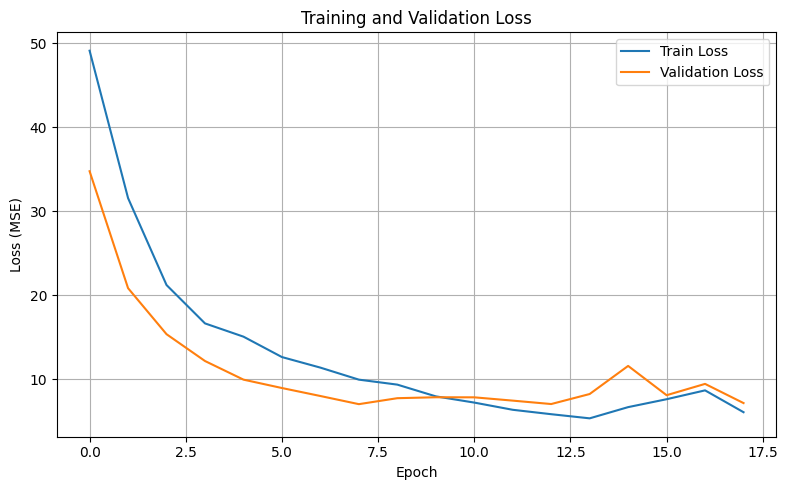

In [388]:
plt.figure(figsize=(8,5))
plt.plot(train_loss_history, label="Train Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


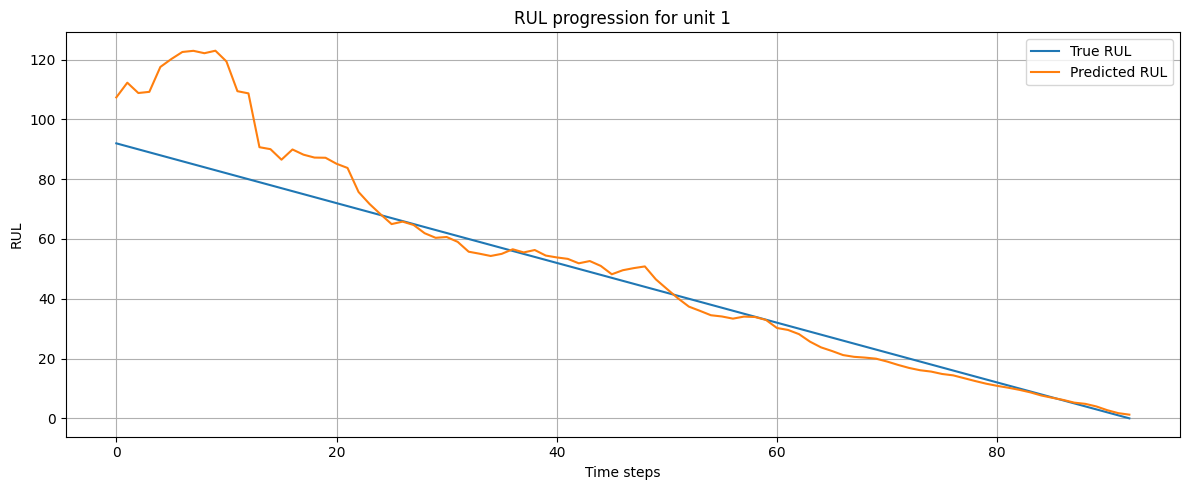

In [389]:
unit = 1  

unit_rows = val_df[val_df["unit"] == unit]
n_rows = len(unit_rows) - window_size + 1

unit_offsets = []
offset = 0
for u in val_df["unit"].unique():
    rows = len(val_df[val_df["unit"] == u]) - window_size + 1
    if rows <= 0:
        continue
    if u == unit:
        start_idx = offset
        break
    offset += rows


plt.figure(figsize=(12,5))
plt.plot(
    range(n_rows),
    true[start_idx : start_idx + n_rows],
    label="True RUL"
)
plt.plot(
    range(n_rows),
    preds[start_idx : start_idx + n_rows],
    label="Predicted RUL"
)
plt.xlabel("Time steps")
plt.ylabel("RUL")
plt.title(f"RUL progression for unit {unit}")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


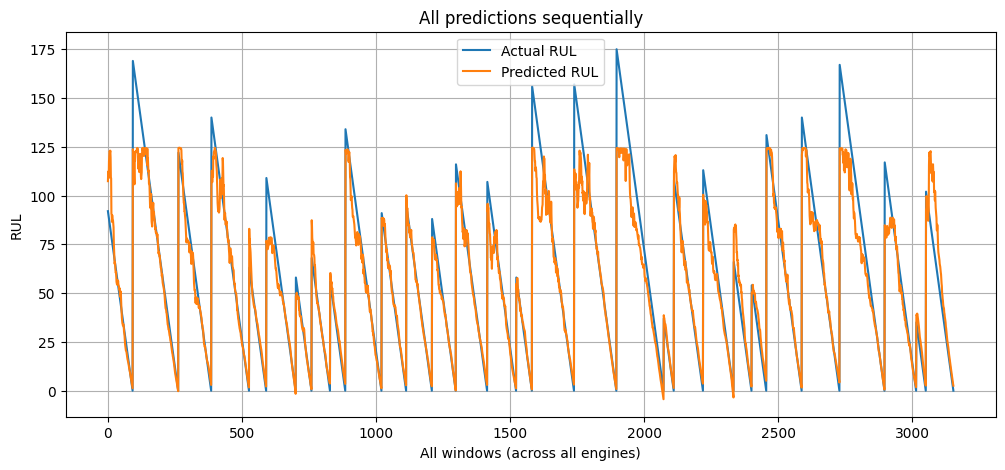

In [390]:
plt.figure(figsize=(12,5))
plt.plot(range(len(true)), true, label="Actual RUL")
plt.plot(range(len(preds)), preds, label="Predicted RUL")
plt.xlabel("All windows (across all engines)")
plt.ylabel("RUL")
plt.title("All predictions sequentially")
plt.legend()
plt.grid(True)
plt.show()


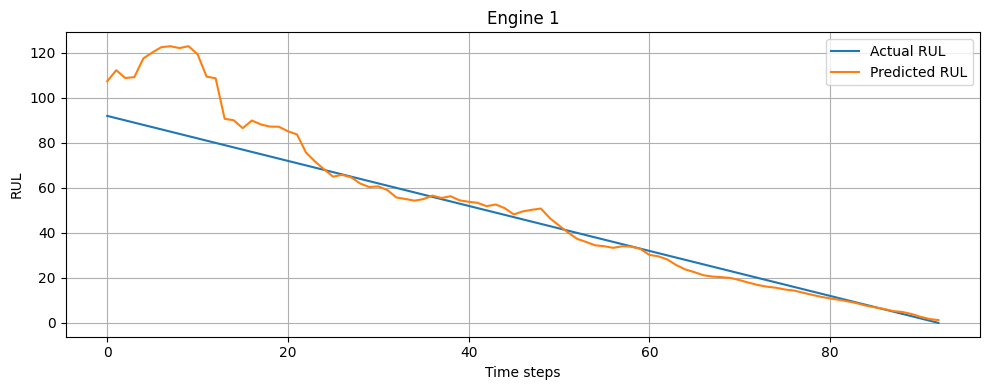

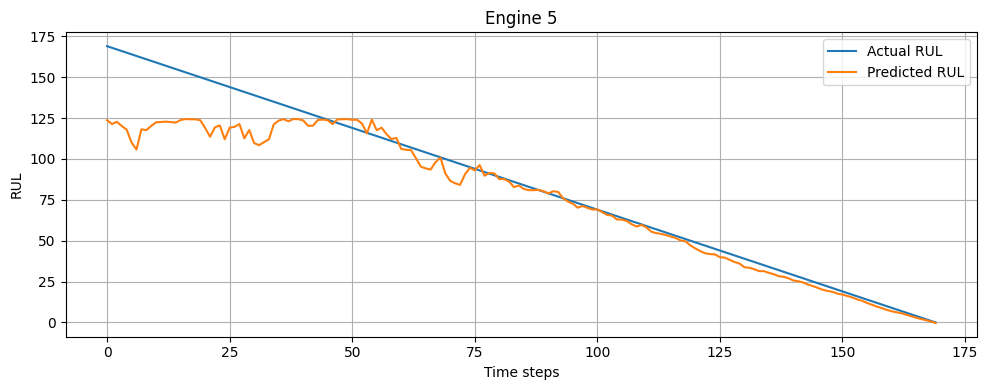

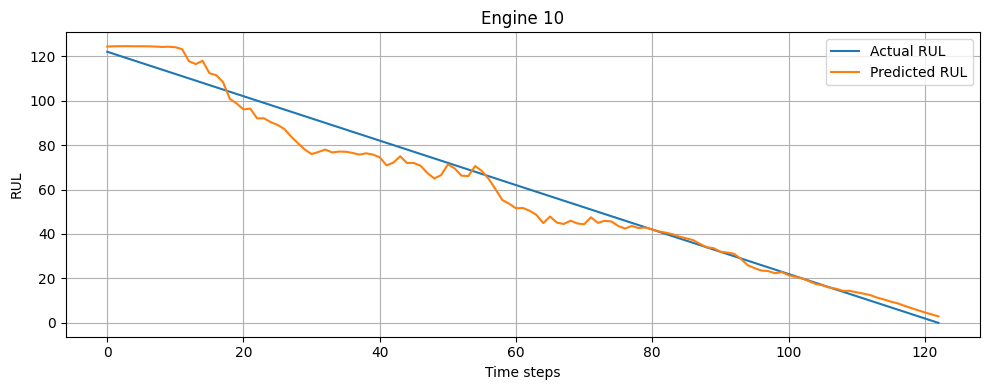

In [391]:
num_engines_to_plot = 3
current_idx = 0

for unit in val_df["unit"].unique()[:num_engines_to_plot]:
    n_rows = len(val_df[val_df["unit"] == unit]) - window_size + 1
    if n_rows <= 0:
        continue

    plt.figure(figsize=(10,4))
    plt.plot(range(n_rows), true[current_idx:current_idx+n_rows], label="Actual RUL")
    plt.plot(range(n_rows), preds[current_idx:current_idx+n_rows], label="Predicted RUL")
    plt.title(f"Engine {unit}")
    plt.xlabel("Time steps")
    plt.ylabel("RUL")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    current_idx += n_rows


# Test data

In [392]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()


df_test = pd.read_csv(
    "test_FD001.txt",
    sep="\s+",
    header=None,
    names=col_names,
    engine="python"
)

# true RULs 
df_rul = pd.read_csv(
    "RUL_FD001.txt",
    sep="\s+",
    header=None,
    names=["RUL"],
    engine="python"
)
df_rul["unit"] = df_rul.index + 1

#  Merge 
test_df = df_test.merge(df_rul, on="unit")


feat_cols_test = list(scaler.feature_names_in_)
missing = set(feat_cols_test) - set(test_df.columns)
if missing:
    raise ValueError(f"Missing columns needed for scaling: {missing}")
test_df[feat_cols_test] = scaler.transform(test_df[feat_cols_test])

# one window per engine, padding short ones
X_last, y_last = [], []
for uid in test_df.unit.unique():
    df_u   = test_df[test_df.unit == uid]
    data_u = df_u[feat_cols_test].values        
    rul_u  = df_u["RUL"].values                 

    if len(data_u) >= window_size:
        
        window = data_u[-window_size:]
    else:
        
        pad_len = window_size - len(data_u)
        pad_block = np.tile(data_u[0:1], (pad_len, 1))
        window = np.vstack([pad_block, data_u])

    X_last.append(window)
    y_last.append(rul_u[-1])  

X_last = np.stack(X_last)     
y_last = np.array(y_last)     

model = BiLSTMRegressor(input_size=input_size, hidden_size=hidden_size).to(device)
model.load_state_dict(torch.load("best_bilstm_model.pt"))

model.eval()
with torch.no_grad():
    Xg    = torch.tensor(X_last, dtype=torch.float32).to(device)
    preds = model(Xg).view(-1).cpu().numpy()


mae = mean_absolute_error(y_last, preds)
mse = mean_squared_error(y_last, preds)
r2  = r2_score(y_last, preds)

print(f"\nTest (one‑window‑per‑engine, padded) MAE : {mae:.4f}")
print(f"Test (one‑window‑per‑engine, padded) MSE : {mse:.4f}")
print(f"Test (one‑window‑per‑engine, padded) R²  : {r2:.4f}")



Test (one‑window‑per‑engine, padded) MAE : 10.5977
Test (one‑window‑per‑engine, padded) MSE : 244.5926
Test (one‑window‑per‑engine, padded) R²  : 0.8584


C:\Users\tanuj\AppData\Local\Temp\ipykernel_13568\843464486.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_bilstm_model.pt"))


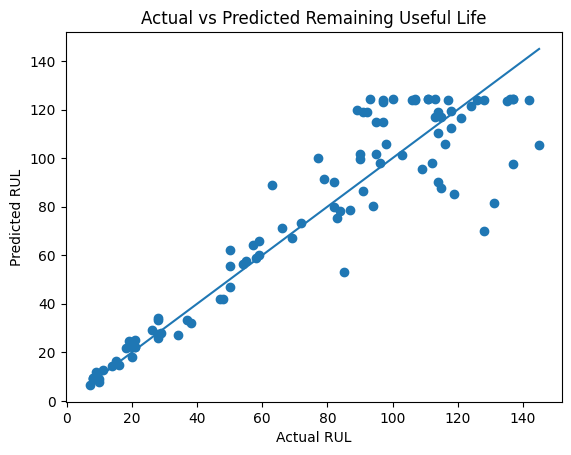

In [393]:
plt.figure()
plt.scatter(y_last, preds)
min_val = min(y_last.min(), preds.min())
max_val = max(y_last.max(), preds.max())
plt.plot([min_val, max_val], [min_val, max_val])
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs Predicted Remaining Useful Life")
plt.show()